In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [66]:
df = pd.read_csv('diabetes.csv')

In [67]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = df['Outcome']

## Scaling and splitting

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit(X).transform(X)


In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=42)

## Model fitting

In [71]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [72]:
clf.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Evaluation Function

In [73]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

In [74]:
def print_score(clf, X_train, X_test, y_train, y_test, train = True):
#     print accuracy score, classification report, confusion metrics
    if train:
#         training performance
        print('Train Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_train, clf.predict(X_train))))
        print('Classification Report : \n {} \n'.format(classification_report(y_train, clf.predict(X_train))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')
        print('Average Accuracy : {0:.4f}\n'.format(np.mean(res)))
        print('Accuracy SD : {0:.4f}\n'.format(np.std(res)))
        
    elif train == False:
#         test performance
        print('Test Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_test, clf.predict(X_test))))
        print('Classification Report : \n {}\n'.format(classification_report(y_test, clf.predict(X_test))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_test, clf.predict(X_test))))

## Performance Report

In [75]:
print_score(clf, X_train, X_test, Y_train, Y_test, train = True)

Train Result : 

Accuracy Score 0.7704

Classification Report : 
              precision    recall  f1-score   support

          0       0.79      0.88      0.83       401
          1       0.72      0.56      0.63       213

avg / total       0.76      0.77      0.76       614
 

Confusion Metrics : 
 [[354  47]
 [ 94 119]] 

Average Accuracy : 0.7655

Accuracy SD : 0.0409



In [76]:
print_score(clf, X_train, X_test, Y_train, Y_test, train = False)

Test Result : 

Accuracy Score 0.7532

Classification Report : 
              precision    recall  f1-score   support

          0       0.81      0.80      0.81        99
          1       0.65      0.67      0.66        55

avg / total       0.76      0.75      0.75       154


Confusion Metrics : 
 [[79 20]
 [18 37]] 



## Now Applying Results Achieved from Feature Selection

In [77]:
X = df[['Glucose', 'BloodPressure', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = df['Outcome']

In [78]:
X_scaled = StandardScaler().fit(X).transform(X)

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=42)

In [80]:
clf.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
print_score(clf, X_train, X_test, Y_train, Y_test, train = True)

Train Result : 

Accuracy Score 0.7785

Classification Report : 
              precision    recall  f1-score   support

          0       0.80      0.89      0.84       401
          1       0.73      0.58      0.64       213

avg / total       0.77      0.78      0.77       614
 

Confusion Metrics : 
 [[355  46]
 [ 90 123]] 

Average Accuracy : 0.7721

Accuracy SD : 0.0378



In [82]:
print_score(clf, X_train, X_test, Y_train, Y_test, train = False)

Test Result : 

Accuracy Score 0.7662

Classification Report : 
              precision    recall  f1-score   support

          0       0.81      0.83      0.82        99
          1       0.68      0.65      0.67        55

avg / total       0.76      0.77      0.77       154


Confusion Metrics : 
 [[82 17]
 [19 36]] 



## Plotting precision and recall for thresholds

In [83]:
y_scores = cross_val_predict(clf, X_train, Y_train, cv=3, method='decision_function')

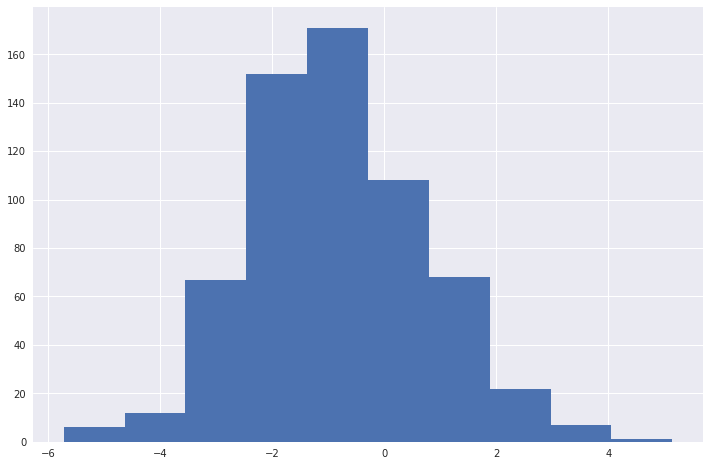

In [84]:
plt.figure(figsize=(12,8)); plt.hist(y_scores, bins=10);

## Getting the PR Curve

In [85]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(Y_train, y_scores)

In [86]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([-0.5,1.5])    

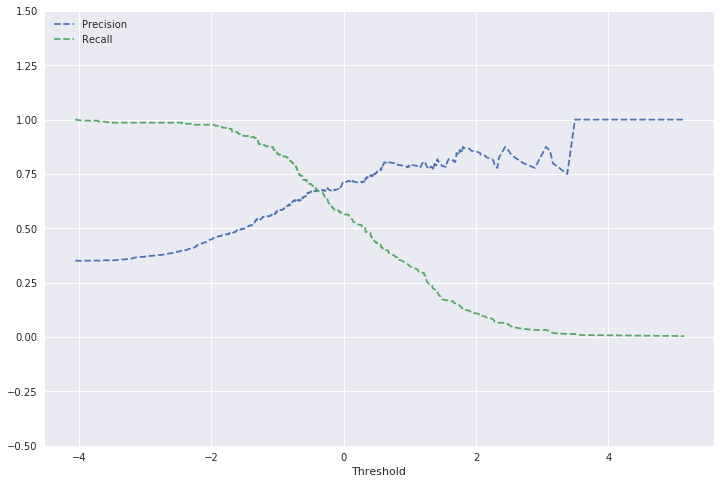

In [87]:
plt.figure(figsize=(12,8)); 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

## Plotting Roc Curve

In [88]:
from sklearn.metrics import roc_curve

In [89]:
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)

In [90]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

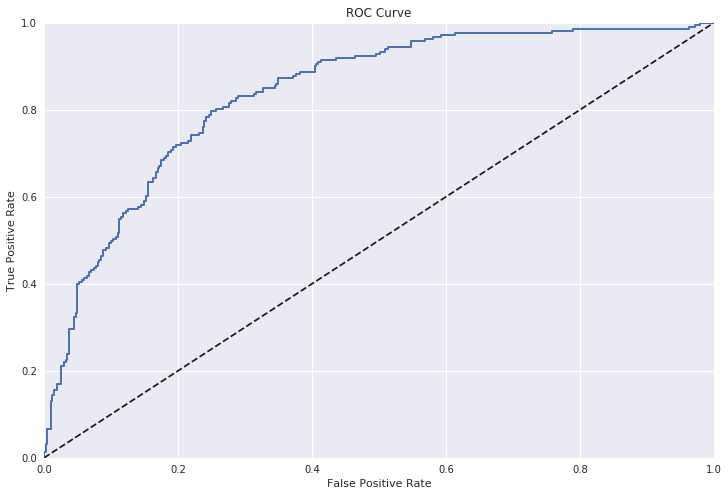

In [91]:
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();

### Roc Accuracy Score 

In [92]:
from sklearn.metrics import roc_auc_score

In [93]:
roc_auc_score(Y_train, y_scores)

0.83696861133551093

## Grid Search

In [94]:
from sklearn.pipeline import Pipeline 

In [95]:
from sklearn.model_selection import GridSearchCV 

In [96]:
pipeline = Pipeline([('clf', LogisticRegression(C=1, tol=0.0001))]) 

In [97]:
params = {'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20), 
          'clf__tol':(0.001, 0.01, 0.1, 0.00001, 0.000001, 0.25, 0.75)} 

In [98]:
Log_clf = GridSearchCV(pipeline, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy') 

In [99]:
Log_clf.fit(X_train, Y_train) 

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    0.2s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('clf', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20), 'clf__tol': (0.001, 0.01, 0.1, 1e-05, 1e-06, 0.25, 0.75)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [100]:
Log_clf.best_score_

0.77035830618892509

In [101]:
best = Log_clf.best_estimator_.get_params() 

In [102]:
for k in sorted(params.keys()): 
    print('\t{0}: \t {1:.3f}'.format(k, best[k]))

	clf__C: 	 0.500
	clf__tol: 	 0.001


In [115]:
new_clf =LogisticRegression(C=0.5, tol=0.001)
new_clf.fit(X_train,Y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.001,
          verbose=0, warm_start=False)

In [116]:
print_score(new_clf, X_train, X_test, Y_train, Y_test, train = False)

Test Result : 

Accuracy Score 0.7662

Classification Report : 
              precision    recall  f1-score   support

          0       0.81      0.83      0.82        99
          1       0.68      0.65      0.67        55

avg / total       0.76      0.77      0.77       154


Confusion Metrics : 
 [[82 17]
 [19 36]] 



In [117]:
print_score(new_clf, X_train, X_test, Y_train, Y_test, train = True)

Train Result : 

Accuracy Score 0.7785

Classification Report : 
              precision    recall  f1-score   support

          0       0.80      0.89      0.84       401
          1       0.73      0.58      0.64       213

avg / total       0.77      0.78      0.77       614
 

Confusion Metrics : 
 [[355  46]
 [ 90 123]] 

Average Accuracy : 0.7721

Accuracy SD : 0.0378

